In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
!pip install plotly

In [3]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/african_crises.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [7]:
df.shape

(1059, 14)

In [8]:
df.isnull().sum()

,0
case,0
cc3,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [9]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [10]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [11]:
df_numeric = df.select_dtypes(include=[np.number])  # Keeps only numeric columns
correlation_matrix = df_numeric.corr()

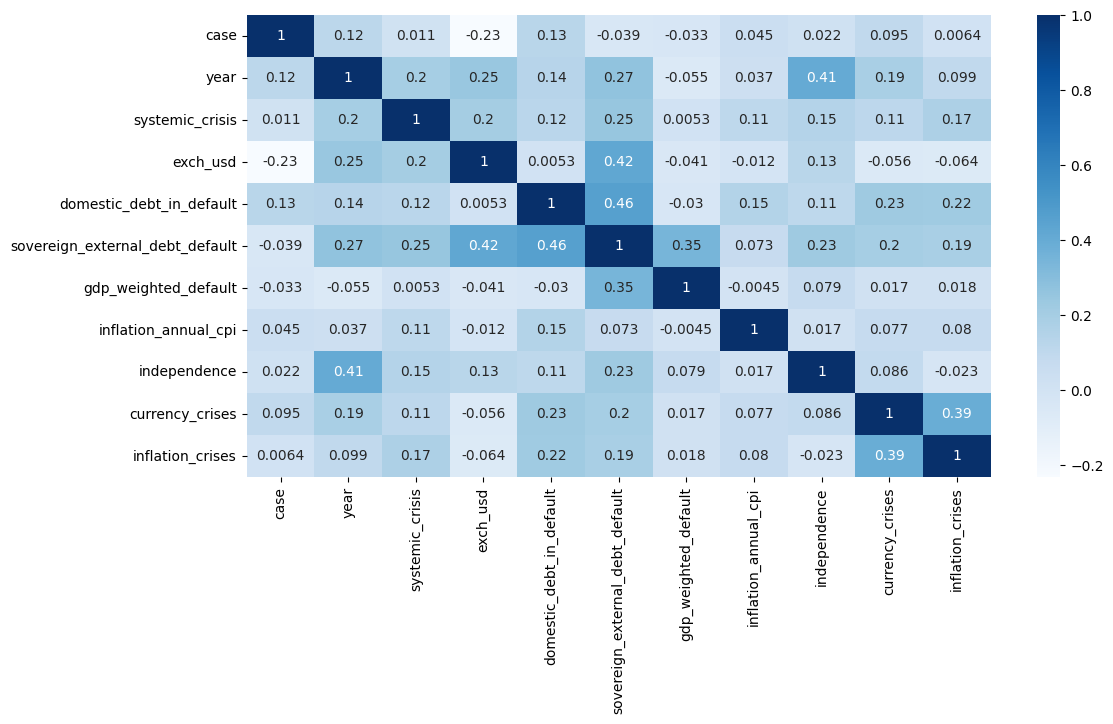

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df_numeric.corr(),annot=True,cmap='Blues')
plt.show()

In [13]:
px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')

In [14]:
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

In [15]:
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

In [16]:
px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

In [17]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')

In [18]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')

In [19]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [20]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

In [21]:
df_bk=df.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

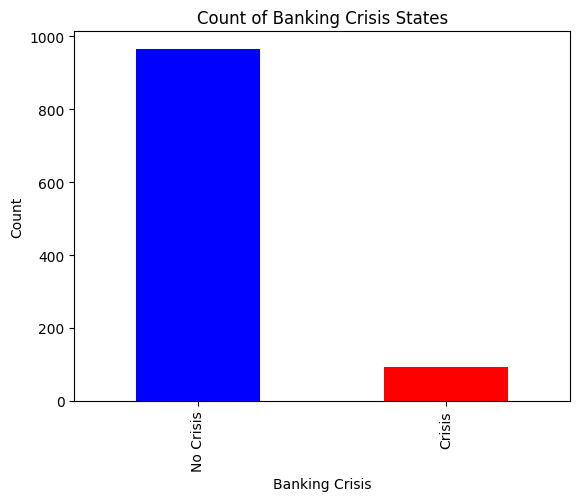

In [23]:
df['banking_crisis'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Banking Crisis')
plt.ylabel('Count')
plt.title('Count of Banking Crisis States')
plt.xticks(ticks=[0, 1], labels=['No Crisis', 'Crisis'])  # Labeling categories
plt.show()

In [24]:
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

      case  cc3  country  year  systemic_crisis      exch_usd  \
0        1    3        0  1870                1  5.226400e-02   
1        1    3        0  1871                0  5.279800e-02   
2        1    3        0  1872                0  5.227400e-02   
3        1    3        0  1873                0  5.168000e-02   
4        1    3        0  1874                0  5.130800e-02   
...    ...  ...      ...   ...              ...           ...   
1104    63    9       10  1992                1  9.506500e-01   
1105    10    1        2  1981                1  2.873998e+02   
1106    70   12       12  2009                1  3.548000e+02   
1107    70   12       12  2004                1  5.600000e-23   
1108    45    8        8  1995                1  2.188663e+01   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((776, 13), (333, 13), (776,), (333,))

In [26]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [27]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[291   2]
 [  5  35]]
Outcome values : 
 291 2 5 35
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       293
           0       0.95      0.88      0.91        40

    accuracy                           0.98       333
   macro avg       0.96      0.93      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.9 %
Precision : 98.3 %
Recall : 99.3 %
F1 Score : 0.988
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 93.4 %
MCC : 0.898
roc_auc_score: 0.934


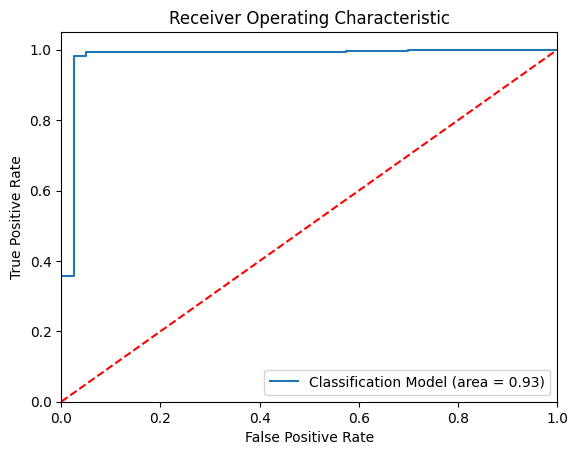

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.02
roc_auc_score: 0.502


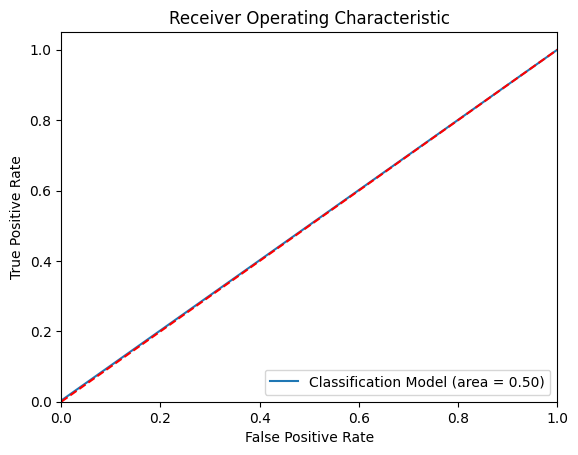

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[287   6]
 [  2  38]]
Outcome values : 
 287 6 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       293
           0       0.86      0.95      0.90        40

    accuracy                           0.98       333
   macro avg       0.93      0.96      0.95       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 97.6 %
Precision : 99.3 %
Recall : 98.0 %
F1 Score : 0.986
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 96.5 %
MCC : 0.892
roc_auc_score: 0.965


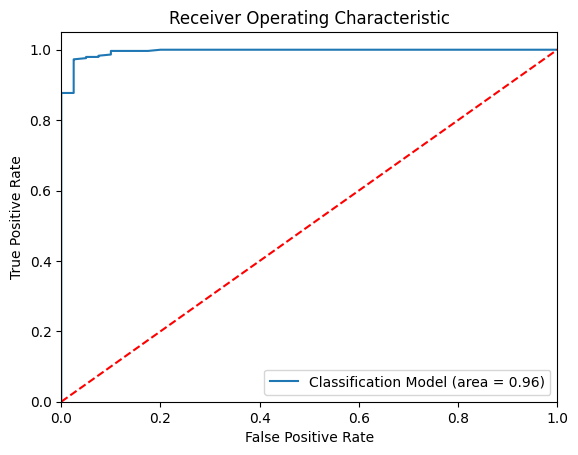

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[289   4]
 [  2  38]]
Outcome values : 
 289 4 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.90      0.95      0.93        40

    accuracy                           0.98       333
   macro avg       0.95      0.97      0.96       333
weighted avg       0.98      0.98      0.98       333

Accuracy : 98.2 %
Precision : 99.3 %
Recall : 98.6 %
F1 Score : 0.99
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 96.8 %
MCC : 0.917
roc_auc_score: 0.968


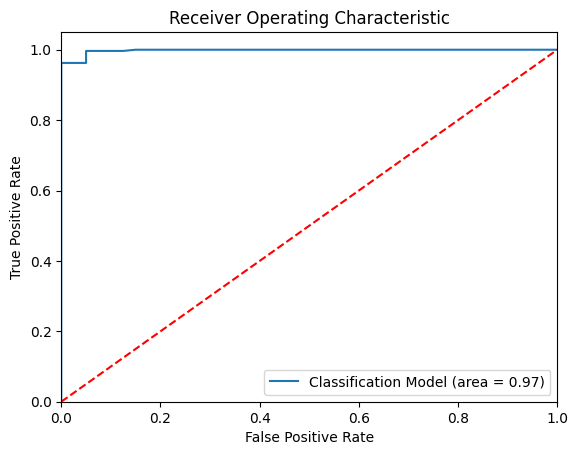

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[290   3]
 [  2  38]]
Outcome values : 
 290 3 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.93      0.95      0.94        40

    accuracy                           0.98       333
   macro avg       0.96      0.97      0.96       333
weighted avg       0.99      0.98      0.99       333

Accuracy : 98.5 %
Precision : 99.3 %
Recall : 99.0 %
F1 Score : 0.991
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 97.0 %
MCC : 0.93
roc_auc_score: 0.97


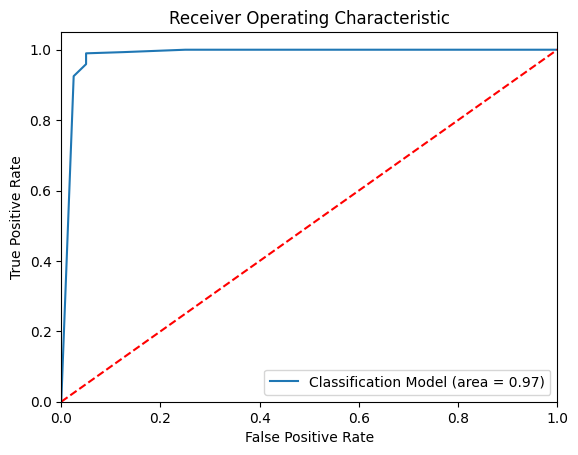

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[291   2]
 [  2  38]]
Outcome values : 
 291 2 2 38
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       293
           0       0.95      0.95      0.95        40

    accuracy                           0.99       333
   macro avg       0.97      0.97      0.97       333
weighted avg       0.99      0.99      0.99       333

Accuracy : 98.8 %
Precision : 99.3 %
Recall : 99.3 %
F1 Score : 0.993
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 97.2 %
MCC : 0.943
roc_auc_score: 0.972


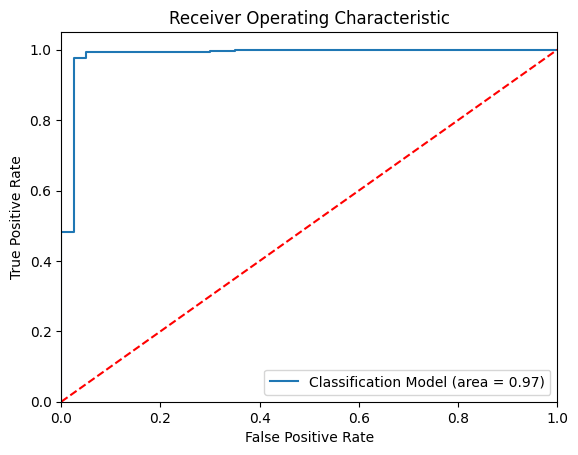

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.02
roc_auc_score: 0.502


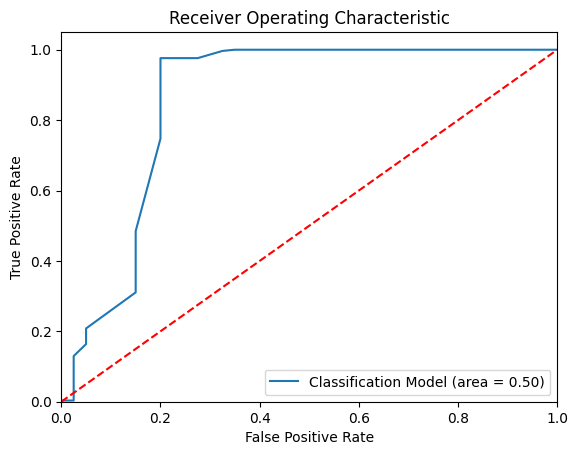

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[282  11]
 [  1  39]]
Outcome values : 
 282 11 1 39
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.96      0.98       293
           0       0.78      0.97      0.87        40

    accuracy                           0.96       333
   macro avg       0.89      0.97      0.92       333
weighted avg       0.97      0.96      0.97       333

Accuracy : 96.4 %
Precision : 99.6 %
Recall : 96.2 %
F1 Score : 0.979
Specificity or True Negative Rate : 97.5 %
Balanced Accuracy : 96.8 %
MCC : 0.853
roc_auc_score: 0.969


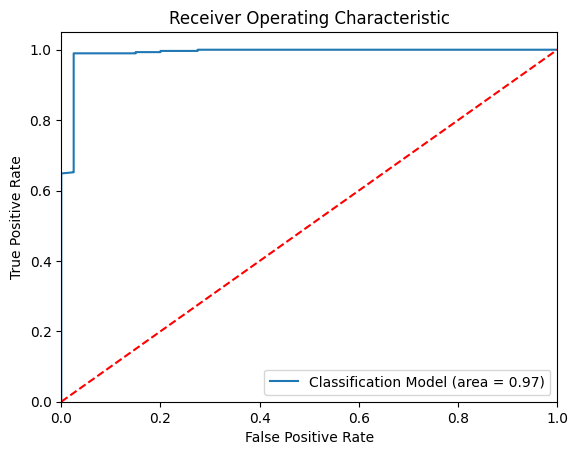

-----------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 672, number of negative: 104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.865979 -> initscore=1.865867
[LightGBM] [Info] Start training from score 1.865867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

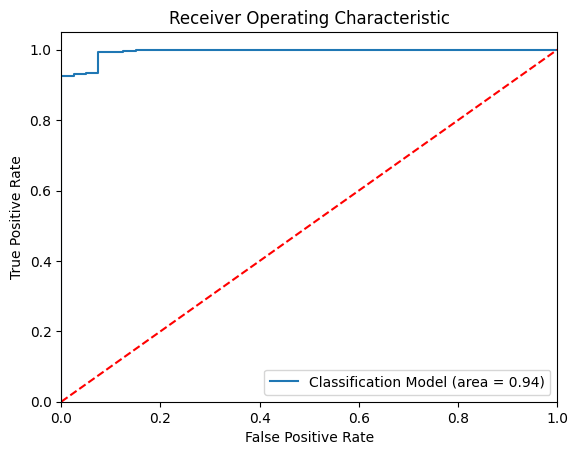

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[  1 292]
 [  0  40]]
Outcome values : 
 1 292 0 40
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.01       293
           0       0.12      1.00      0.22        40

    accuracy                           0.12       333
   macro avg       0.56      0.50      0.11       333
weighted avg       0.89      0.12      0.03       333

Accuracy : 12.3 %
Precision : 100.0 %
Recall : 0.3 %
F1 Score : 0.007
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.02
roc_auc_score: 0.502


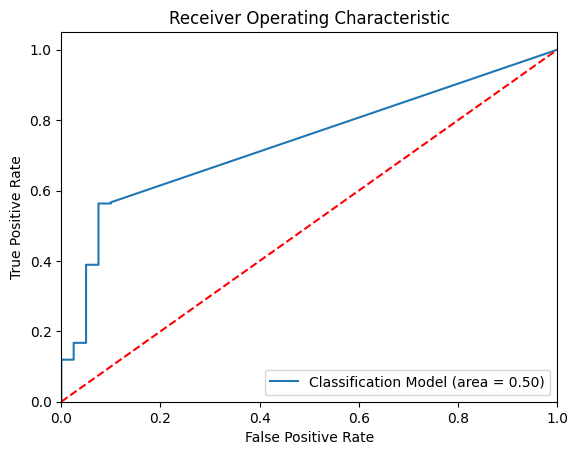

-----------------------------------------------------------------------------------------------------


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize the result DataFrame with appropriate columns
result = pd.DataFrame(columns=[
    'Model Name', 'True Positive', 'False Negative', 'False Positive', 'True Negative',
    'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'
])

# Initialize models
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                            bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                            n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0,
                                     max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
                                     n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Add models to a list
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]

# Loop through the models
for models in MM:
    # Fit the model
    models.fit(x_train, y_train)

    # Prediction
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name
    print('Model Name: ', models)

    # confusion matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = matrix.reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(y_test, y_pred, labels=[1,0])
    print('Classification report : \n', C_Report)

    # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3)
    specificity = round(tn/(tn+fp), 3)
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
    balanced_accuracy = round((sensitivity+specificity)/2, 3)
    precision = round(tp/(tp+fp), 3)
    f1Score = round((2*tp/(2*tp + fp + fn)), 3)

    # Matthews Correlation Coefficient (MCC)
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    # Displaying the results
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100, 2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100, 2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
    print('MCC :', MCC)

    # Area under ROC curve
    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

    # ROC Curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='Classification Model (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    # Prepare a new row as a DataFrame, not a dictionary
    new_row = pd.DataFrame([{
        'Model Name': str(models),
        'True Positive': tp,
        'False Negative': fn,
        'False Positive': fp,
        'True Negative': tn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': sensitivity,
        'F1 Score': f1Score,
        'Specificity': specificity,
        'MCC': MCC,
        'ROC_AUC_Score': roc_auc_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy
    }])

    # Concatenate the new row to the result DataFrame
    result = pd.concat([result, new_row], ignore_index=True)

    print('-----------------------------------------------------------------------------------------------------')

In [29]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),291,2,5,35,0.979,0.983,0.993,0.988,0.875,0.898,0.934087,0.934
1,DecisionTreeClassifier(),1,292,0,40,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501
2,RandomForestClassifier(),287,6,2,38,0.976,0.993,0.980,0.986,0.950,0.892,0.964761,0.965
3,ExtraTreesClassifier(),289,4,2,38,0.982,0.993,0.986,0.990,0.950,0.917,0.968174,0.968
4,KNeighborsClassifier(),290,3,2,38,0.985,0.993,0.990,0.991,0.950,0.930,0.969881,0.970
5,SVC(probability=True),291,2,2,38,0.988,0.993,0.993,0.993,0.950,0.943,0.971587,0.972
6,BaggingClassifier(n_estimators=100),1,292,0,40,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501
7,GradientBoostingClassifier(),282,11,1,39,0.964,0.996,0.962,0.979,0.975,0.853,0.968729,0.968
8,LGBMClassifier(),277,16,3,37,0.943,0.989,0.945,0.967,0.925,0.774,0.935196,0.935
9,GaussianNB(),1,292,0,40,0.123,1.000,0.003,0.007,1.000,0.020,0.501706,0.501


In [30]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.988,0.993,0.993,0.993,291,2,2,38
1,KNeighborsClassifier,0.985,0.993,0.990,0.991,290,3,2,38
2,ExtraTreesClassifier,0.982,0.993,0.986,0.990,289,4,2,38
3,LogisticRegression,0.979,0.983,0.993,0.988,291,2,5,35
4,RandomForestClassifier,0.976,0.993,0.980,0.986,287,6,2,38
5,GradientBoostingClassifier,0.964,0.996,0.962,0.979,282,11,1,39
6,LGBMClassifier,0.943,0.989,0.945,0.967,277,16,3,37
7,DecisionTreeClassifier,0.123,1.000,0.003,0.007,1,292,0,40
8,BaggingClassifier,0.123,1.000,0.003,0.007,1,292,0,40
9,GaussianNB,0.123,1.000,0.003,0.007,1,292,0,40


From the above results, the top model is Support Vector Classifier

In [32]:
y_pred=ModelSVM.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_bk.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)
out[['country','year','banking_crisis','predicted']].sample(10)

,country,year,banking_crisis,predicted
591,Morocco,1958,no_crisis,no_crisis
657,Nigeria,1963,no_crisis,no_crisis
708,South Africa,1900,no_crisis,no_crisis
535,Mauritius,1977,no_crisis,no_crisis
1039,Zimbabwe,1994,no_crisis,no_crisis
1000,Zimbabwe,1955,no_crisis,no_crisis
1056,Zimbabwe,2011,no_crisis,no_crisis
261,Ivory Coast,1993,no_crisis,no_crisis
482,Kenya,1992,crisis,crisis
424,Egypt,2001,no_crisis,no_crisis
